# "DeepLearning from Scratch"
> "A summary of DeepLearning from Scratch book. perceptron, multi-layer perceptron, activation function, backpropagation"

- toc: true 
- badges: true
- comments: true
- categories: [deeplearning][backpropagation]
- image: images/chart-preview.png

# 밑바닥부터 시작하는 딥러닝 도서내용을 간단히 정리해 봤다.
## 2장 Perceptron
* AND , NAND, OR 게이트를 구현해 본다.

In [2]:
import numpy as np
# AND 게이트
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [3]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.arange(-1.2, 1.3, 0.1)
ys = np.arange(-1.2, 1.3, 0.1)

print('xs:', xs.shape, xs,'\n', 'ys:', ys.shape, ys)
xs, ys = np.meshgrid(xs, ys)
print('xs:', xs.shape, xs,'\n', 'ys:', ys.shape, ys)
# sin함수를 가지고 z축을 만들어서 그래프 생성 test
z = np.sin(xs+ys)

xs: (25,) [-1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  1.11022302e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00] 
 ys: (25,) [-1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  1.11022302e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00]
xs: (25, 25) [[-1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
  -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
  -4.00000000e-01

In [52]:
#hide
print(z)

[(-1.2, -1.2, 0), (-1.2, -1.0999999999999999, 0), (-1.2, -0.9999999999999998, 0), (-1.2, -0.8999999999999997, 0), (-1.2, -0.7999999999999996, 0), (-1.2, -0.6999999999999995, 0), (-1.2, -0.5999999999999994, 0), (-1.2, -0.49999999999999933, 0), (-1.2, -0.39999999999999925, 0), (-1.2, -0.29999999999999916, 0), (-1.2, -0.19999999999999907, 0), (-1.2, -0.09999999999999898, 0), (-1.2, 1.1102230246251565e-15, 0), (-1.2, 0.1000000000000012, 0), (-1.2, 0.2000000000000013, 0), (-1.2, 0.3000000000000014, 0), (-1.2, 0.40000000000000147, 0), (-1.2, 0.5000000000000016, 0), (-1.2, 0.6000000000000016, 0), (-1.2, 0.7000000000000017, 0), (-1.2, 0.8000000000000018, 0), (-1.2, 0.9000000000000019, 0), (-1.2, 1.000000000000002, 0), (-1.2, 1.100000000000002, 0), (-1.2, 1.2000000000000022, 0), (-1.0999999999999999, -1.2, 0), (-1.0999999999999999, -1.0999999999999999, 0), (-1.0999999999999999, -0.9999999999999998, 0), (-1.0999999999999999, -0.8999999999999997, 0), (-1.0999999999999999, -0.7999999999999996, 0),

### graph로 표현

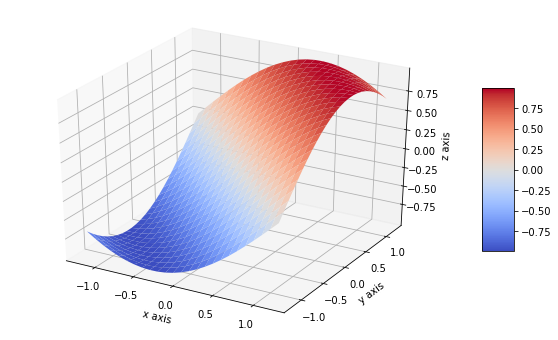

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xs,ys,z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.2, antialiased=True)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [ ]:
# # AND 게이트 그래프로 표현
# z = AND(xs,ys)
# surfand = ax.plot_surface(xs,ys,z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.2, antialiased=True)
# ax.set_xlabel('x axis')
# ax.set_ylabel('y axis')
# ax.set_zlabel('z axis')
# fig.colorbar(surfand, shrink=0.5, aspect=5)

(11,) [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
X1: (11, 11) [[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]]
Y1: (11, 11) [[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [ -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.]
 [ -6.  -6.  -6.  -6.  -6.  -6.  -6.  -6.  -6.  -6.  -6.]
 [ -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.]
 [ -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2

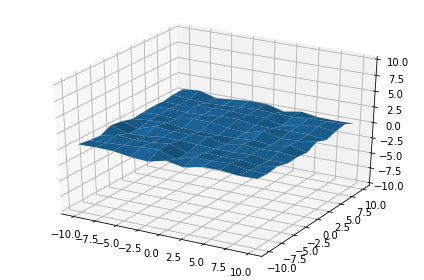

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-10, 10, 11)
X1 = np.tile(x1, (11, 1))
Y1 = np.transpose(X1)
Z1 = np.random.rand(11, 11)
print(x1.shape, x1)
print("X1:", X1.shape, X1)
print("Y1:", Y1.shape, Y1)
print("Z1:", Z1.shape, Z1)

ax.plot_surface(X1, Y1, Z1)
ax.set_zlim(-10, 10)

plt.tight_layout()
plt.show()

In [41]:
xs = np.arange(-1.2, 1.3, 0.1)
ys = np.arange(-1.2, 1.3, 0.1)


In [42]:
z=[]
for x in xs:
    for y in ys:
        z.append((x,y,AND(x,y)))

In [43]:
z

[(-1.2, -1.2, 0),
 (-1.2, -1.0999999999999999, 0),
 (-1.2, -0.9999999999999998, 0),
 (-1.2, -0.8999999999999997, 0),
 (-1.2, -0.7999999999999996, 0),
 (-1.2, -0.6999999999999995, 0),
 (-1.2, -0.5999999999999994, 0),
 (-1.2, -0.49999999999999933, 0),
 (-1.2, -0.39999999999999925, 0),
 (-1.2, -0.29999999999999916, 0),
 (-1.2, -0.19999999999999907, 0),
 (-1.2, -0.09999999999999898, 0),
 (-1.2, 1.1102230246251565e-15, 0),
 (-1.2, 0.1000000000000012, 0),
 (-1.2, 0.2000000000000013, 0),
 (-1.2, 0.3000000000000014, 0),
 (-1.2, 0.40000000000000147, 0),
 (-1.2, 0.5000000000000016, 0),
 (-1.2, 0.6000000000000016, 0),
 (-1.2, 0.7000000000000017, 0),
 (-1.2, 0.8000000000000018, 0),
 (-1.2, 0.9000000000000019, 0),
 (-1.2, 1.000000000000002, 0),
 (-1.2, 1.100000000000002, 0),
 (-1.2, 1.2000000000000022, 0),
 (-1.0999999999999999, -1.2, 0),
 (-1.0999999999999999, -1.0999999999999999, 0),
 (-1.0999999999999999, -0.9999999999999998, 0),
 (-1.0999999999999999, -0.8999999999999997, 0),
 (-1.0999999999999

In [45]:
len(z), type(z)

(625, list)

In [46]:
import pandas as pd
zf = pd.DataFrame(z)
zf

,0,1,2
0,-1.2,-1.2,0
1,-1.2,-1.1,0
2,-1.2,-1.0,0
3,-1.2,-0.9,0
4,-1.2,-0.8,0
...,...,...,...
620,1.2,0.8,1
621,1.2,0.9,1
622,1.2,1.0,1
623,1.2,1.1,1


In [47]:
zf.iloc[:,0]

0     -1.2
1     -1.2
2     -1.2
3     -1.2
4     -1.2
      ... 
620    1.2
621    1.2
622    1.2
623    1.2
624    1.2
Name: 0, Length: 625, dtype: float64

In [48]:
xf=zf.iloc[:,0]
yf=zf.iloc[:,1]
print(xf)
yf

0     -1.2
1     -1.2
2     -1.2
3     -1.2
4     -1.2
      ... 
620    1.2
621    1.2
622    1.2
623    1.2
624    1.2
Name: 0, Length: 625, dtype: float64


0     -1.2
1     -1.1
2     -1.0
3     -0.9
4     -0.8
      ... 
620    0.8
621    0.9
622    1.0
623    1.1
624    1.2
Name: 1, Length: 625, dtype: float64

In [49]:
zz=zf.iloc[:,2]
print(zz)

0      0
1      0
2      0
3      0
4      0
      ..
620    1
621    1
622    1
623    1
624    1
Name: 2, Length: 625, dtype: int64


In [50]:
xm,ym = np.meshgrid(xf, yf) 
print(xm)
ym

[[-1.2 -1.2 -1.2 ...  1.2  1.2  1.2]
 [-1.2 -1.2 -1.2 ...  1.2  1.2  1.2]
 [-1.2 -1.2 -1.2 ...  1.2  1.2  1.2]
 ...
 [-1.2 -1.2 -1.2 ...  1.2  1.2  1.2]
 [-1.2 -1.2 -1.2 ...  1.2  1.2  1.2]
 [-1.2 -1.2 -1.2 ...  1.2  1.2  1.2]]


array([[-1.2, -1.2, -1.2, ..., -1.2, -1.2, -1.2],
       [-1.1, -1.1, -1.1, ..., -1.1, -1.1, -1.1],
       [-1. , -1. , -1. , ..., -1. , -1. , -1. ],
       ...,
       [ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ],
       [ 1.1,  1.1,  1.1, ...,  1.1,  1.1,  1.1],
       [ 1.2,  1.2,  1.2, ...,  1.2,  1.2,  1.2]])

In [56]:
xm.shape, ym.shape

((625, 625), (625, 625))

In [59]:
zf.head()

,0,1,2
0,-1.2,-1.2,0
1,-1.2,-1.1,0
2,-1.2,-1.0,0
3,-1.2,-0.9,0
4,-1.2,-0.8,0


In [73]:
zking=zf.iloc[:,2].to_numpy()
len(zking), zking.shape, zking

(625,
 (625,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [76]:
zqueen = zking.copy()
print(zqueen.sum(),zqueen)
zqueen.shape

66 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

(625,)

In [78]:
zqueen.resize(625,625)
print(zqueen.sum(),zqueen)
zqueen.shape

66 [[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(625, 625)

In [86]:
zqueen[:]

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
zqueen.shape, zqueen

((256, 256),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [71]:
print(z2d)

None


In [93]:
tfs=np.ones((625,625))
tfs

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [94]:
znp = zking.copy()
znp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [95]:
last= znp*tfs
last.shape

(625, 625)

In [96]:
last

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

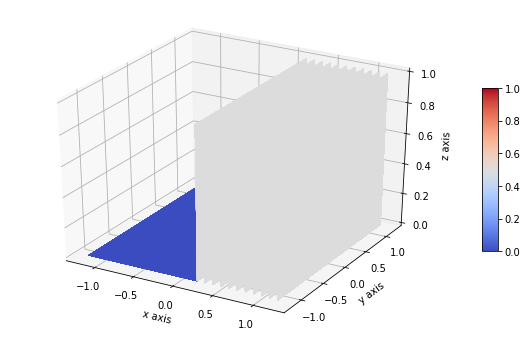

In [97]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xm, ym, last, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.2, antialiased=True)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
fig.colorbar(surf, shrink=0.5, aspect=10)

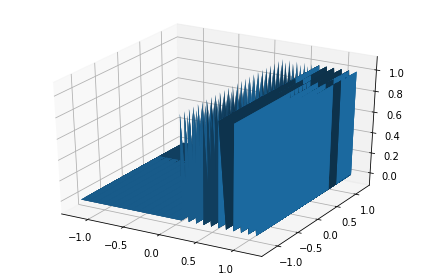

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# x1 = np.linspace(-10, 10, 11)
# X1 = np.tile(x1, (11, 1))
# Y1 = np.transpose(X1)
# Z1 = np.random.rand(11, 11)
# print(x1.shape, x1)
# print("X1:", X1.shape, X1)
# print("Y1:", Y1.shape, Y1)
# print("Z1:", Z1.shape, Z1)

ax.plot_surface(xm, ym, last)
ax.set_zlim(-0.1, 1.1)

plt.tight_layout()
plt.show()

In [36]:
xs, ys = np.meshgrid(zf.iloc[:,0],zf.iloc[:,1])


array([[-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
       [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
       [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
       ...,
       [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
       [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
       [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2]])

In [39]:
print(ys, ys.shape)
xs, xs.shape

[[-1.2 -1.2 -1.2 ... -1.2 -1.2 -1.2]
 [-1.1 -1.1 -1.1 ... -1.1 -1.1 -1.1]
 [-1.  -1.  -1.  ... -1.  -1.  -1. ]
 ...
 [ 1.   1.   1.  ...  1.   1.   1. ]
 [ 1.1  1.1  1.1 ...  1.1  1.1  1.1]
 [ 1.2  1.2  1.2 ...  1.2  1.2  1.2]] (625, 625)


(array([[-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
        [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
        [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
        ...,
        [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
        [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2],
        [-1.2, -1.2, -1.2, ...,  1.2,  1.2,  1.2]]),
 (625, 625))

In [40]:
zf.iloc[:,0]

0     -1.2
1     -1.2
2     -1.2
3     -1.2
4     -1.2
      ... 
620    1.2
621    1.2
622    1.2
623    1.2
624    1.2
Name: 0, Length: 625, dtype: float64